In [41]:
#Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.metrics import accuracy_score


import warnings
#warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore")
!pip install mord

Processing /Users/Yunhao/Library/Caches/pip/wheels/80/1d/8a/bef1a01b6a3c91494905d161d5426c181819f9730a773141eb/mord-0.6-py3-none-any.whl


## Import Original data

The original data has been pre-processed through the file 'KaggleSalary_DataSet.ipynb'. The following modifications has been done to the multiple_choices_response.csv.

1. Dropping rows with the missing salary entries (Current yearly compensation)
2. Dropping rows containing the text content of each question
3. Combining the salary buckets and encoding the labels

In [2]:
#Input file
input_file_salary = 'Kaggle_Salary.csv'
Salary = pd.read_csv(input_file_salary, low_memory=False)
print(Salary.shape)
Salary

(12497, 248)


,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT,Q10_Encoded,Q10_buckets
0,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,3,"30,000-39,999"
1,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0,"0-9,999"
2,391,40-44,Male,-1,Australia,Master’s degree,Other,0,"> 10,000 employees",20+,...,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN,-1,14,">250,000"
3,392,22-24,Male,-1,India,Bachelor’s degree,Other,1,0-49 employees,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0,"0-9,999"
4,470,50-54,Male,-1,France,Master’s degree,Data Scientist,-1,0-49 employees,3-4,...,NaN,AWS Relational Database Service,NaN,NaN,NaN,NaN,NaN,-1,6,"60,000-69,999"
5,529,22-24,Male,-1,India,Master’s degree,Data Scientist,-1,50-249 employees,20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,1,"10,000-19,999"
6,624,22-24,Female,-1,United States of America,Bachelor’s degree,Data Scientist,-1,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,8,"80,000-89,999"
7,691,55-59,Male,-1,Netherlands,Master’s degree,Other,2,0-49 employees,1-2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0,"0-9,999"
8,459,30-34,Male,-1,Germany,Master’s degree,Statistician,-1,0-49 employees,5-9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0,"0-9,999"
9,397,30-34,Male,-1,Germany,Bachelor’s degree,Data Scientist,-1,50-249 employees,5-9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,7,"70,000-79,999"


## 1. Data cleaning

As several values in the datasets are missing and some features are categorical, data cleaning is necessary before implementing the logistic regression algorithm. 

### 1.1 Handle the missing values

**Procedure:**: Remove the columns that at least 40% of their entries are missing (NaN)

**Justification:**: For the purpose of the following data exploration and classification, any selected subset of data should contain at least 5000 training points. With 12497 data points given, it is reasonable to set the threshold as 40% which is equivalent to 5000 entries.


**Result and impact:** There are 56 columns left in the dataset. The columns dropped are related to Q9, Q12, Q13, Q16~Q21 and Q24~Q34. The columns removed are mainly from the second half part of the questionaire. The reason could be the questionaire is too lengthy and most of the interviewees lost their patience to complete. Removing the parts of questions that has lower than 50% response rate help remove the features that could not provide enough information since most of the observations are missing. It also helps reduce the time required for training the regression model. The impact on the model accuracy is small and accepetable.


In [3]:
missing_40 = []
threshold_1 = 0.4
for col in Salary.columns:
    num_NaN = Salary[col].isnull().sum()
    if num_NaN >= threshold_1 * Salary.shape[0]:
        missing_40.append(col)

print('The following columns are dropped due to at least 40% of entries are missing:')
print ('\n'.join(missing_40))

for col in missing_40:
    Salary.drop([col], axis=1, inplace = True)

print('The number of columns remained in the dataset:', Salary.shape[1])

The following columns are dropped due to at least 40% of entries are missing:
Q9_Part_1
Q9_Part_2
Q9_Part_3
Q9_Part_4
Q9_Part_5
Q9_Part_6
Q9_Part_7
Q9_Part_8
Q12_Part_1
Q12_Part_2
Q12_Part_3
Q12_Part_5
Q12_Part_6
Q12_Part_7
Q12_Part_8
Q12_Part_9
Q12_Part_10
Q12_Part_11
Q12_Part_12
Q13_Part_1
Q13_Part_2
Q13_Part_3
Q13_Part_4
Q13_Part_5
Q13_Part_6
Q13_Part_7
Q13_Part_8
Q13_Part_9
Q13_Part_10
Q13_Part_11
Q13_Part_12
Q16_Part_2
Q16_Part_3
Q16_Part_4
Q16_Part_5
Q16_Part_6
Q16_Part_7
Q16_Part_8
Q16_Part_9
Q16_Part_10
Q16_Part_11
Q16_Part_12
Q17_Part_1
Q17_Part_2
Q17_Part_3
Q17_Part_4
Q17_Part_5
Q17_Part_6
Q17_Part_7
Q17_Part_8
Q17_Part_9
Q17_Part_10
Q17_Part_11
Q17_Part_12
Q18_Part_2
Q18_Part_3
Q18_Part_4
Q18_Part_5
Q18_Part_6
Q18_Part_7
Q18_Part_8
Q18_Part_9
Q18_Part_10
Q18_Part_11
Q18_Part_12
Q20_Part_1
Q20_Part_3
Q20_Part_4
Q20_Part_5
Q20_Part_6
Q20_Part_7
Q20_Part_8
Q20_Part_9
Q20_Part_10
Q20_Part_11
Q20_Part_12
Q21_Part_2
Q21_Part_3
Q21_Part_4
Q21_Part_5
Q24_Part_2
Q24_Part_3
Q24_Part_4


**Procedure**: Replace the 'NaN' entry with 'Unknown' if the response missing rate to the question is between 25% and 40%

**Justification**: For the columns that have a response missing rate between 25% and 40%, the replacement of 'NaN' with 'Unknown helps preserve the certain degree of information provided by the feature. The portion that provides valuble information is still relatively large and we should not simply drop these features. 


**Result and impact**: In total 10 columns are selected to replace 'NaN' with the new identifier 'Unknown'. These columns still provides valuable insights on the salary prediction and the replacement has negative impact on the analysis result. However, replacing with 'Unknown' is still much better compared with filling with modes of the response or simply dropping the column.


In [4]:
missing_25 = []
threshold_2 = 0.25

for col in Salary.columns:
    num_NaN = Salary[col].isnull().sum()
    if num_NaN >= threshold_2 * Salary.shape[0] and num_NaN < threshold_1 * Salary.shape[0]:
        missing_25.append(col)
        
print('The NaN in the following columns are replaced with Unknown:')
print ('\n'.join(missing_25))

for col in missing_25:
    Salary.loc[Salary[col].isnull(),col] = 'Unknown'


The NaN in the following columns are replaced with Unknown:
Q12_Part_4
Q16_Part_1
Q18_Part_1
Q20_Part_2
Q21_Part_1
Q24_Part_1


**Procedure**: Replace the 'NaN' entry with modes of the column if the response missing rate to the question is between 5% and 25%

**Justification**: For the columns that have a response missing rate between 5% and 25%, the replacement of 'NaN' with modes helps preserve the certain degree of information provided by the feature. The portion that provides valuble information is at least 75%. Meanwhile the modes provide representative information of features and prevent loss of data.


**Result and impact**: In total 5 columns are selected to replace 'NaN' with the modes. These columns provide valuable insights on the salary prediction and the replacement has negative impact on the analysis result. Since the dataset is large, replacing with modes adds bias and variance to the dataset.

In [5]:
missing_5 = []
threshold_3 = 0.05

for col in Salary.columns:
    num_NaN = Salary[col].isnull().sum()
    if num_NaN >= threshold_3 * Salary.shape[0] and num_NaN < threshold_2 * Salary.shape[0]:
        missing_5.append(col)
        
print('The NaN in the following columns are replaced with mode:')
print ('\n'.join(missing_5))

for col in missing_5:
    Salary[col].fillna(Salary[col].mode()[0], inplace = True)

The NaN in the following columns are replaced with mode:
Q14
Q15
Q19
Q22
Q23


**Procedure**: Delete the rows that contain missing entries if the response missing rate to the question is below 5% but higher than 0%.

**Justification**: For the columns that have a response missing rate below 5%, they contain valuable and in-depth insights and should not be modified. It is better to just remove the rows(observations) that are missing. Since there are 12497 obsevations available, 5% is set as the threshold to remove the missing entry rows.

**Result and impact**: The column Q11 has a response missing rate between 0% and 5%. There are 247 rows removed which is around 1.97% of the overall dataset. The nagetive impact on the analysis is tiny and acceptable.

In [6]:
missing_row = []

for col in Salary.columns:
    num_NaN = Salary[col].isnull().sum()
    if num_NaN < threshold_3 * Salary.shape[0] and num_NaN > 0:
        missing_row.append(col)

print('The NaN in the following columns are removed:')
print ('\n'.join(missing_row))

for col in missing_row:
    Salary.dropna(subset=[col],inplace=True)

print('Number of rows/observations removed:', 12497-Salary.shape[0])
print('Number of rows/observations left:', Salary.shape[0])

The NaN in the following columns are removed:
Q11
Number of rows/observations removed: 247
Number of rows/observations left: 12250


**Procedure**: Delete the columns that are irrelavent to the prediction

**Justification**: Column title containing 'TEXT' has information that does not help analysis since the code just represents the number of characters entered in the textbox in the online questionaire. Column 'Q10' is the duplication of column 'Q10_buckets', thus it can be dropped. Column 'Time from start to finish' tells time taken to complete the quesitonnaire, but this information does not help make prediction on salary, thus it can be dropped

**Result and impact**: Remove the columns that are irrelavent to the prediction help speed up the analysis and reduce the bias introduced to the model.

In [7]:
Salary = Salary.drop(Salary.filter(regex='TEXT').columns, axis=1)
Salary.drop(['Q10'],axis=1,inplace=True)
Salary.drop(['Time from Start to Finish (seconds)'], axis=1, inplace = True)
print(Salary.shape)
Salary

(12250, 22)


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q11,Q12_Part_4,...,Q16_Part_1,Q18_Part_1,Q19,Q20_Part_2,Q21_Part_1,Q22,Q23,Q24_Part_1,Q10_Encoded,Q10_buckets
0,22-24,Male,France,Master’s degree,Software Engineer,"1000-9,999 employees",0,I do not know,$0 (USD),"Kaggle (forums, blog, social media, etc)",...,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",Python,Python,Matplotlib,CPUs,Never,1-2 years,Linear or Logistic Regression,3,"30,000-39,999"
1,40-44,Male,India,Professional degree,Software Engineer,"> 10,000 employees",20+,"We have well established ML methods (i.e., mod...","> $100,000 ($USD)","Kaggle (forums, blog, social media, etc)",...,Unknown,Unknown,Python,Unknown,Unknown,Never,< 1 years,Unknown,0,"0-9,999"
2,40-44,Male,Australia,Master’s degree,Other,"> 10,000 employees",20+,I do not know,"$10,000-$99,999",Unknown,...,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",Python,Python,Matplotlib,CPUs,Once,2-3 years,Linear or Logistic Regression,14,">250,000"
3,22-24,Male,India,Bachelor’s degree,Other,0-49 employees,0,No (we do not use ML methods),$0 (USD),Unknown,...,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",Python,Python,Matplotlib,CPUs,Never,< 1 years,Linear or Logistic Regression,0,"0-9,999"
4,50-54,Male,France,Master’s degree,Data Scientist,0-49 employees,3-4,"We have well established ML methods (i.e., mod...","$10,000-$99,999",Unknown,...,Unknown,Python,Java,Unknown,CPUs,Never,10-15 years,Linear or Logistic Regression,6,"60,000-69,999"
5,22-24,Male,India,Master’s degree,Data Scientist,50-249 employees,20+,We are exploring ML methods (and may one day p...,$100-$999,"Kaggle (forums, blog, social media, etc)",...,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",Python,Python,Matplotlib,CPUs,6-24 times,2-3 years,Linear or Logistic Regression,1,"10,000-19,999"
6,22-24,Female,United States of America,Bachelor’s degree,Data Scientist,"> 10,000 employees",20+,"We recently started using ML methods (i.e., mo...",$0 (USD),Unknown,...,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",Python,Python,Matplotlib,CPUs,Once,3-4 years,Linear or Logistic Regression,8,"80,000-89,999"
7,55-59,Male,Netherlands,Master’s degree,Other,0-49 employees,1-2,We are exploring ML methods (and may one day p...,$100-$999,"Kaggle (forums, blog, social media, etc)",...,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",Python,Python,Matplotlib,CPUs,Never,< 1 years,Linear or Logistic Regression,0,"0-9,999"
8,30-34,Male,Germany,Master’s degree,Statistician,0-49 employees,5-9,"We recently started using ML methods (i.e., mo...","$1000-$9,999",Unknown,...,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",Unknown,R,Matplotlib,CPUs,2-5 times,4-5 years,Unknown,0,"0-9,999"
9,30-34,Male,Germany,Bachelor’s degree,Data Scientist,50-249 employees,5-9,"We recently started using ML methods (i.e., mo...","$1000-$9,999",Unknown,...,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",Python,R,Unknown,CPUs,Never,4-5 years,Linear or Logistic Regression,7,"70,000-79,999"


After handling the missing values, the preliminary columns are determined for further analysis. Now, rename the column titles according to the original questionaire. 

In [8]:
Salary_E = Salary
Salary_E.columns = ['Age', 'Gender', 'Country', 'Degree', 'Role', 'Company_size', 'Group_size', 'ML_methods',
                    'Money_spent', 'Media', 'Primary_tool', 'Code_Experience', 'IDE', 'Language', 'Suggestion', 
                    'Visualization', 'Hardware', 'TPU_Experience', 'ML_Experience', 'Algorithm', 'Salary_Encoded',
                   'Salary_buckets']
Salary_E

,Age,Gender,Country,Degree,Role,Company_size,Group_size,ML_methods,Money_spent,Media,...,IDE,Language,Suggestion,Visualization,Hardware,TPU_Experience,ML_Experience,Algorithm,Salary_Encoded,Salary_buckets
0,22-24,Male,France,Master’s degree,Software Engineer,"1000-9,999 employees",0,I do not know,$0 (USD),"Kaggle (forums, blog, social media, etc)",...,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",Python,Python,Matplotlib,CPUs,Never,1-2 years,Linear or Logistic Regression,3,"30,000-39,999"
1,40-44,Male,India,Professional degree,Software Engineer,"> 10,000 employees",20+,"We have well established ML methods (i.e., mod...","> $100,000 ($USD)","Kaggle (forums, blog, social media, etc)",...,Unknown,Unknown,Python,Unknown,Unknown,Never,< 1 years,Unknown,0,"0-9,999"
2,40-44,Male,Australia,Master’s degree,Other,"> 10,000 employees",20+,I do not know,"$10,000-$99,999",Unknown,...,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",Python,Python,Matplotlib,CPUs,Once,2-3 years,Linear or Logistic Regression,14,">250,000"
3,22-24,Male,India,Bachelor’s degree,Other,0-49 employees,0,No (we do not use ML methods),$0 (USD),Unknown,...,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",Python,Python,Matplotlib,CPUs,Never,< 1 years,Linear or Logistic Regression,0,"0-9,999"
4,50-54,Male,France,Master’s degree,Data Scientist,0-49 employees,3-4,"We have well established ML methods (i.e., mod...","$10,000-$99,999",Unknown,...,Unknown,Python,Java,Unknown,CPUs,Never,10-15 years,Linear or Logistic Regression,6,"60,000-69,999"
5,22-24,Male,India,Master’s degree,Data Scientist,50-249 employees,20+,We are exploring ML methods (and may one day p...,$100-$999,"Kaggle (forums, blog, social media, etc)",...,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",Python,Python,Matplotlib,CPUs,6-24 times,2-3 years,Linear or Logistic Regression,1,"10,000-19,999"
6,22-24,Female,United States of America,Bachelor’s degree,Data Scientist,"> 10,000 employees",20+,"We recently started using ML methods (i.e., mo...",$0 (USD),Unknown,...,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",Python,Python,Matplotlib,CPUs,Once,3-4 years,Linear or Logistic Regression,8,"80,000-89,999"
7,55-59,Male,Netherlands,Master’s degree,Other,0-49 employees,1-2,We are exploring ML methods (and may one day p...,$100-$999,"Kaggle (forums, blog, social media, etc)",...,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",Python,Python,Matplotlib,CPUs,Never,< 1 years,Linear or Logistic Regression,0,"0-9,999"
8,30-34,Male,Germany,Master’s degree,Statistician,0-49 employees,5-9,"We recently started using ML methods (i.e., mo...","$1000-$9,999",Unknown,...,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",Unknown,R,Matplotlib,CPUs,2-5 times,4-5 years,Unknown,0,"0-9,999"
9,30-34,Male,Germany,Bachelor’s degree,Data Scientist,50-249 employees,5-9,"We recently started using ML methods (i.e., mo...","$1000-$9,999",Unknown,...,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",Python,R,Unknown,CPUs,Never,4-5 years,Linear or Logistic Regression,7,"70,000-79,999"


### 1.2 Handle the categorical data by encoding

Convert the categorical data into numerical data by encoding so that it can be the inputs for the prediction algorithm.


**Procedure:** Use one hot encoding algorithm to help convert general categorical data in to numerical data. Since the Salary has already been encoded, columns 'Salary_Encoded' and 'Salary_buckets' are excluded from the conversion. get_dummies() function converts each category into a binary column which using 0 and 1 as indicators.

**Justifications:** One hot encoding avoids the assumption that there's an ordered relationship between each categorical data. It helps improve the model performance by avoiding overfitting. However, since one hot encoding creates a column for each unique categorical input, the resulted input numerical data could be complicated and lengthy.

**Results:** In total 20 columns of categorical data has been expanded to 167 binary columns.

In [9]:
All_col = ['Age', 'Gender', 'Country', 'Degree', 'Role', 'Company_size', 'Group_size', 'ML_methods',
           'Money_spent', 'Media', 'Primary_tool', 'Code_Experience', 'IDE', 'Language', 'Suggestion', 
           'Visualization', 'Hardware', 'TPU_Experience', 'ML_Experience', 'Algorithm']
Salary_Encoded = pd.get_dummies(Salary_E, columns = All_col, prefix = All_col)
#Salary_Encoded['Salary_Encoded'] = Salary_E['Salary_Encoded']
Salary_Encoded.head()

,Salary_Encoded,Salary_buckets,Age_18-21,Age_22-24,Age_25-29,Age_30-34,Age_35-39,Age_40-44,Age_45-49,Age_50-54,...,ML_Experience_1-2 years,ML_Experience_10-15 years,ML_Experience_2-3 years,ML_Experience_20+ years,ML_Experience_3-4 years,ML_Experience_4-5 years,ML_Experience_5-10 years,ML_Experience_< 1 years,Algorithm_Linear or Logistic Regression,Algorithm_Unknown
0,3,"30,000-39,999",0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,0,"0-9,999",0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
2,14,">250,000",0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,"0-9,999",0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,6,"60,000-69,999",0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0


In [10]:
Salary_Encoded.shape

(12250, 167)

## 2. Exploratory Data Analysis

### 2.1 Trends in data
Present the trend in data so that it can help with the task of predicting salary and understand the data. From the salary histogram, it can be seen most of the salary reported are in the range '0-9999 (USD)'. It also can be found that there are no obvious outliers and the distribution seems reasonable. Based on the histogram, the salary data collected has good integrity and authenticity.

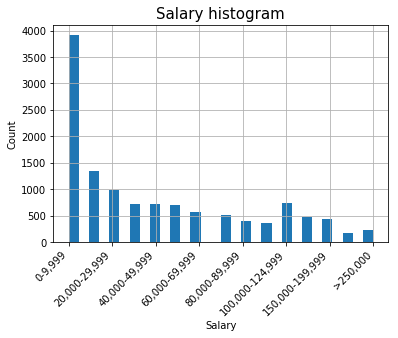

In [11]:
fig_0 = Salary_E['Salary_Encoded'].hist(bins=30)
xlabels =['0','0-9,999',  '20,000-29,999', '40,000-49,999','60,000-69,999', '80,000-89,999', 
          '100,000-124,999', '150,000-199,999', '>250,000']
fig_0.set_xticklabels(xlabels, rotation = 45, ha='right')
plt.xlabel('Salary', size = 10)
plt.ylabel('Count', size = 10)
plt.title('Salary histogram', size= 15);

#### 1) Relationship between education and Salary

From the following boxplot, it can be found that the education level does affect the salary. Generally, higher the degree obtained, higher the salary achieved. Among all the degrees, Doctoral degree has the highest 25 percentile, median and 75 percentile salary. People with Master degree earns more salary than people with Professional degree and Bachelor degree. People who answered 'I prefer not to answer' rarely earn salary over 125,000. The salary distribution related to education is reasonable and further consolidates the integrity and authenticity of data collected.

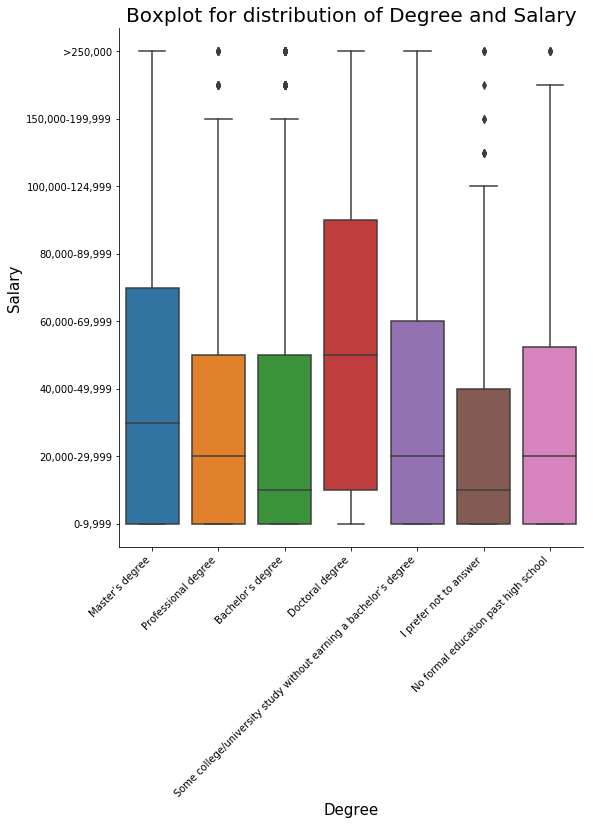

In [12]:
# Salary distribution related to education

fig_1 = sns.catplot(x='Degree', y='Salary_Encoded', kind = 'box', height=8, data = Salary_E)
fig_1.set_xticklabels(rotation = 45, ha='right');
ylabels =['0','0-9,999',  '20,000-29,999', '40,000-49,999','60,000-69,999', '80,000-89,999', 
          '100,000-124,999', '150,000-199,999', '>250,000']
fig_1.set_yticklabels(ylabels)
plt.xlabel('Degree', size = 15)
plt.ylabel('Salary', size = 15)
plt.title('Boxplot for distribution of Degree and Salary', size= 20);

#### 2) Relationship between job titles and salary

From the following boxplot, it can be found that the job titles does affect the salary. Among all the job titles, Data Scientists and Product Managers earn the highest salary. Software engineer and data analyst earn the lowest salary and few of them make money more than 200,000. However, the median salary for other job titles do not vary a lot. For example, research scientist and business analyst earn the same median salary. Data engineer and Database engineer also earn the same median salary. The salary distribution related to job titles is reasonable and further consolidates the integrity and authenticity of data collected.

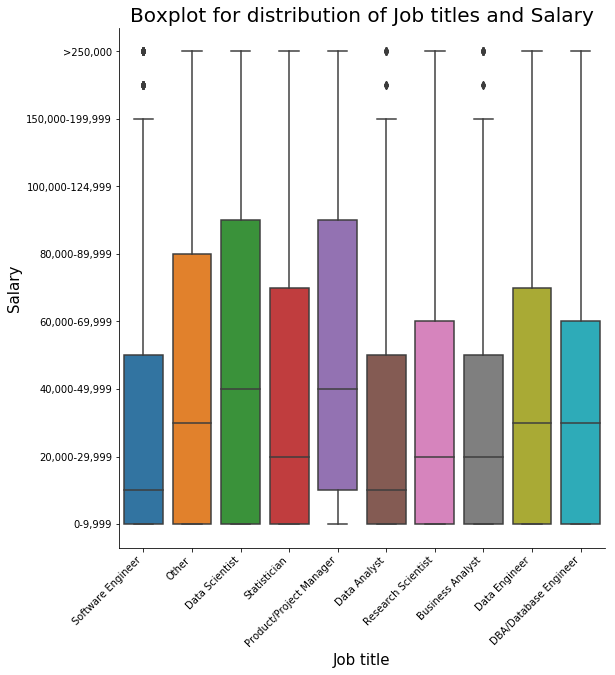

In [13]:
#Salary distribution related to current job titles

fig_2 = sns.catplot(x='Role', y='Salary_Encoded', kind = 'box', height=8, data = Salary_E)
fig_2.set_xticklabels(rotation = 45, ha='right');
ylabels =['0','0-9,999',  '20,000-29,999', '40,000-49,999','60,000-69,999', '80,000-89,999', 
          '100,000-124,999', '150,000-199,999', '>250,000']
fig_2.set_yticklabels(ylabels)
plt.xlabel('Job title', size = 15)
plt.ylabel('Salary', size = 15)
plt.title('Boxplot for distribution of Job titles and Salary', size= 20);

#### 3) Relationship between machine learning experience and salary

From the following boxplot, it can be found that the machine learning experience does affect the salary. As the machine learning experience increases, the salary increases as well. This suggests that the experience has strong positive relationship with the salary earned. People with machine learning experience less than 1 year rarely make salary over 125,000. The salary distribution related to machine learning experience is reasonable and further consolidates the integrity and authenticity of data collected.

In addition, this boxplot also confirms that there is an orderly relationship between the categorical data related to experience. Therefore, columns related to experience such as 'Code experience' and 'TPU experience', should be encoded with ordinary labels. 

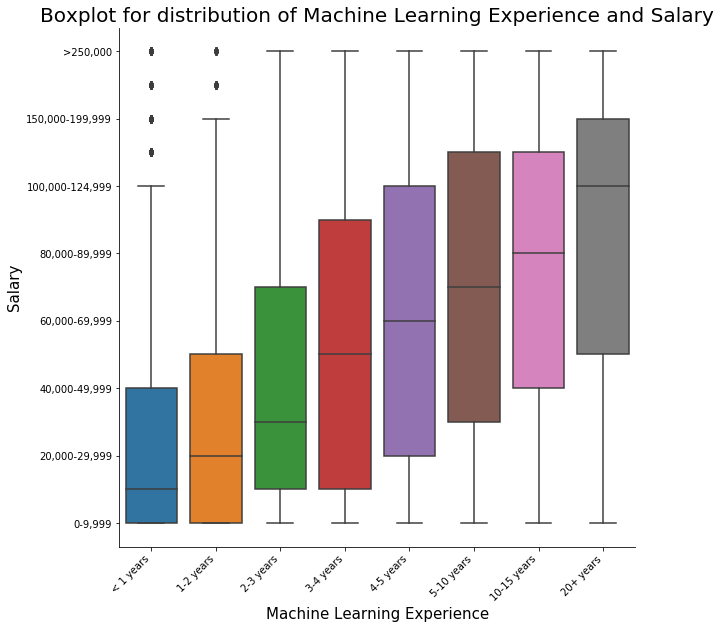

In [14]:
order =['< 1 years', '1-2 years', '2-3 years', '3-4 years', '4-5 years', '5-10 years', '10-15 years', '20+ years']

fig_3 = sns.catplot(x='ML_Experience', y='Salary_Encoded', kind = 'box', height= 8, data = Salary_E, order= order)
fig_3.set_xticklabels(rotation = 45, ha='right');
ylabels =['0','0-9,999',  '20,000-29,999', '40,000-49,999','60,000-69,999', '80,000-89,999', 
          '100,000-124,999', '150,000-199,999', '>250,000']
fig_3.set_yticklabels(ylabels)
plt.xlabel('Machine Learning Experience', size = 15)
plt.ylabel('Salary', size = 15)
plt.title('Boxplot for distribution of Machine Learning Experience and Salary', size= 20);

### 2.2 Visualize the order of importance of features

**Procedure:** Encode the columns that relate to years of experience and money_spent first. Encode the rest of the columns using Label_Encoder from sklern library. Then, use the seaborn library to plot a heatmap based on the correlation between each feature and salary.


**Justification:** In order to visualize the feature importance, it is necessary to convert catogorical data to numerical data so that the correlation between the features and salary can be determined. First, I mannually encode the columns that contain categorical data with orderly relationship as I have confirmed from the boxplot above. For the rest of columns, although the Label_Encoder assumes orderly relationship between categorical inputs, it still can reveal the relationship between the input and output through Pearson correlation coefficient. A Pearson correlation is a number between -1 and 1 that indicates the extent to which two variables are linearly related. Through a heatmap, the pearson coefficient which indicates the importance of each feature can be visualized.

**Results:** From the heatmap, the 5 most important and 5 least important features are determined. <br>
             Most important features: <br>
             1. Code Experience      (p = 0.42)
             2. Age                  (p = 0.37)
             3. Country              (p = 0.36)
             4. ML Experience        (P = 0.34)
             5. Money spent per year (p = 0.34)
             
Least important features:
             1. Role                 (p = -0.013)
             2. IDE tools            (p = -0.024)
             3. Visualization tools  (p = 0.025)
             4. Programming language (p = -0.040)
             5. TPU experience       (p = 0.046)
             
             

In [15]:
Salary_Fea = Salary_E.copy()

def Experience_encoder1 (value):
    mapdict = {'< 1 years': 0, '1-2 years': 1.5, '2-3 years': 2.5, '3-4 years': 3.5, 
               '4-5 years': 4.5, '5-10 years': 7.5,  '10-15 years': 12.5, '20+ years': 20}
    return mapdict[value]

def Experience_encoder2 (value):
    mapdict = {'I have never written code': -1, '< 1 years': 0, '1-2 years': 1.5, '2-3 years': 2.5, 
               '3-5 years': 4, '4-5 years': 4.5, '5-10 years': 7.5, '10-20 years': 15, '20+ years': 20}
    return mapdict[value]

def Experience_encoder3 (value):
    mapdict = {'Never': 0, 'Once': 1, '2-5 times': 3.5, '6-24 times': 15, '> 25 times': 25}
    return mapdict[value]

def Experience_encoder4 (value):
    mapdict = {'$0 (USD)': 0, '$1-$99': 1, '$100-$999': 2, '$1000-$9,999': 3, '$10,000-$99,999': 4,
                '> $100,000 ($USD)': 5}
    return mapdict[value]

def Experience_encoder5 (value):
    mapdict = {'I prefer not to answer': 0, 'No formal education past high school': 1, 
               'Some college/university study without earning a bachelor’s degree': 2,
               'Bachelor’s degree':3,'Professional degree':4,
               'Master’s degree':5, 'Doctoral degree':6}
    
    return mapdict[value]

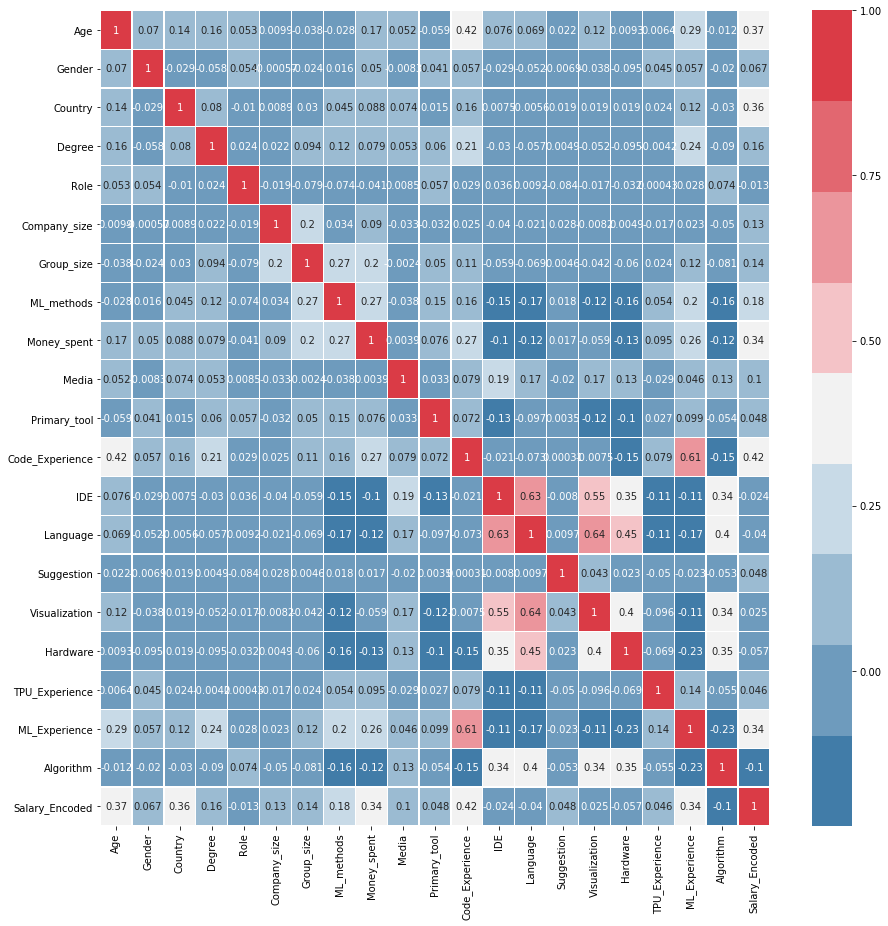

In [16]:
plt.figure(figsize=(15,15))
labelencoder = LabelEncoder()

Salary_F = Salary_E.copy()
Salary_F.drop(['Salary_buckets'], axis=1, inplace=True)

for col in Salary_F.columns:
    Salary_F[col] = labelencoder.fit_transform(Salary_F[col])

Salary_F['ML_Experience'] = Salary_Fea['ML_Experience'].apply(Experience_encoder1)
Salary_F['Code_Experience'] = Salary_Fea['Code_Experience'].apply(Experience_encoder2)
Salary_F['TPU_Experience'] = Salary_Fea['TPU_Experience'].apply(Experience_encoder3)
Salary_F['Money_spent'] = Salary_Fea['Money_spent'].apply(Experience_encoder4)
Salary_F['Degree'] = Salary_Fea['Degree'].apply(Experience_encoder5)

cmap = sns.diverging_palette(240, 10, n=9)
fig_4 = sns.heatmap(Salary_F.corr(method = 'pearson'), annot = True, cmap = cmap, linewidths = 0.2)

### 3.0 Feature selection
Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. If feature engineering is done correctly, it increases the predictive power of machine learning algorithms by creating features from raw data that help facilitate the machine learning process. However if the feature engineering fails to translate the crucial information from the data collected, the perfomance of machine learning algorithm will become poorer. In this section, feature selection is applied to make the machine learning algorithm focus on the important features. It not only speeds up the algorithm but also improve the model performance by introducing less noise.

#### 3.1 Lasso Regression ( L1 regularized regression) method 

Regularisation consists in adding a penalty to the different parameters of the machine learning model to reduce the freedom of the model and in other words to avoid overfitting. In regularized regression, the penalty is applied over the coefficients that multiply each of the predictors. Lasso or L1 regression has the property that is able to shrink some of the coefficients to zero. Therefore, that feature can be removed from the model. In addition, a threshold can be applied to the shrinked coefficients. If a feature has a non-zero coefficient but smaller than the threshold, that feature will be removed from the model due to insignificant relationship with the output. <br>

There are total 20 features to begin with.

**Result:** <br>
As the threshold set to 0.1, no feature was removed through the Lasso Regression, which suggests that all 20 input features contain some extent of important information to the prediction. In order to select the features that are more important than the others, a new threshold should be applied.<br>
<br>
As the threshold set to 1.0, 8 features were removed through the Lasso Regression. These features are: <br>
<br>
'Role' | 'Primary_tool' | 'IDE' | 'Algorithm' | 'Suggestion' | 'Visualization'| 'Hardware'| 'TPU_Experience' <br>
<br>
Compared with the visualization of feature importance in Part 2.2, we can see that these features are exactly the features that have weak correlation with the salary predicted. Therefore, Lasso Regression helps determine the more important features as expected.


In [17]:
Salary_3 = Salary_F.copy()

y = Salary_3['Salary_Encoded']
Salary_3.drop(['Salary_Encoded'], axis=1, inplace = True)
X = Salary_3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=0, shuffle=True)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)

sel_ = SelectFromModel(LogisticRegression(solver = 'liblinear', C=1, penalty='l1', multi_class='auto'), threshold=0.1)
sel_.fit(X_train, y_train)
sel_.get_support()
selected_feature = X.columns[(sel_.get_support())]
print('The following features are selected when the threshold is set to 0.1:\n',selected_feature)

sel_ = SelectFromModel(LogisticRegression(solver = 'liblinear', C=1, penalty='l1', multi_class='auto'), threshold=1)
sel_.fit(X_train, y_train)
sel_.get_support()
selected_feature = X.columns[(sel_.get_support())]
print('\n The following features are selected when the threshold is set to 1:\n',selected_feature)

The following features are selected when the threshold is set to 0.1:
 Index(['Age', 'Gender', 'Country', 'Degree', 'Role', 'Company_size',
       'Group_size', 'ML_methods', 'Money_spent', 'Media', 'Primary_tool',
       'Code_Experience', 'IDE', 'Language', 'Suggestion', 'Visualization',
       'Hardware', 'TPU_Experience', 'ML_Experience', 'Algorithm'],
      dtype='object')

 The following features are selected when the threshold is set to 1:
 Index(['Age', 'Gender', 'Country', 'Degree', 'Company_size', 'Group_size',
       'ML_methods', 'Money_spent', 'Media', 'Code_Experience', 'Language',
       'ML_Experience'],
      dtype='object')


#### 3.2 recursive feature elimination (RFE) method

Recursive feature elimination (RFE) is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached. Features are ranked by the model’s coef_ or feature_importances_ attributes, and by recursively eliminating a small number of features per loop, RFE attempts to eliminate dependencies and collinearity that may exist in the model.

**Result:** As the specified number of feature desired set to 12, it can be found that the same 8 features were removed through RFE method. The feature selected by RFE method agrees with the Lasso Regression method with threshold set to 1.0. 

In [18]:
from sklearn.feature_selection import RFE
Salary_3 = Salary_F.copy()

y = Salary_3['Salary_Encoded']
Salary_3.drop(['Salary_Encoded'], axis=1, inplace = True)
X = Salary_3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=0, shuffle=True)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)

model = LogisticRegression()
rfe = RFE(model, 12)
fit = rfe.fit(X_train, y_train)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))
X.columns[(fit.support_)]

Num Features: 12
Selected Features: [ True  True  True  True False  True  True  True  True  True False  True
 False  True False False False False  True False]
Feature Ranking: [1 1 1 1 9 1 1 1 1 1 3 1 8 1 5 6 4 7 1 2]


Index(['Age', 'Gender', 'Country', 'Degree', 'Company_size', 'Group_size',
       'ML_methods', 'Money_spent', 'Media', 'Code_Experience', 'Language',
       'ML_Experience'],
      dtype='object')

#### 3.3 Implementation of feature selection

After completing the step of feature selection, the features that are not selected are removed from the dataframe. Among the features selected, some features has already been mannually encoded, those features remain the same. The rest of selected features has been encoded using One-hot encoding with get_dummies() functions since these features contain categorical inputs which do not have obvious ordered relationship between each other. 

In [32]:
Salary_Selected = Salary_F.copy()
drop_col = ['Role' ,'Primary_tool' , 'IDE' , 'Algorithm' ,'Suggestion' ,
       'Visualization','Hardware','TPU_Experience']

for col in drop_col:
    Salary_Selected.drop([col], axis=1, inplace = True)

Salary_Selected
dummy_col = ['Age', 'Gender', 'Country', 'Company_size', 'Group_size',
           'ML_methods', 'Media', 'Language']
Salary_Selected = pd.get_dummies(Salary_Selected, columns = dummy_col, prefix = dummy_col)
Salary_Selected.head()

,Degree,Money_spent,Code_Experience,ML_Experience,Salary_Encoded,Age_0,Age_1,Age_2,Age_3,Age_4,...,ML_methods_0,ML_methods_1,ML_methods_2,ML_methods_3,ML_methods_4,ML_methods_5,Media_0,Media_1,Language_0,Language_1
0,5,0,1.5,1.5,3,0,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0
1,4,5,-1.0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
2,5,4,1.5,2.5,14,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
3,3,0,0.0,0.0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,1,0
4,5,4,20.0,12.5,6,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0


### 4.0 Model Implementation

**Procedure:**
Implement logstic regression algorithms on the training data using 10-fold cross-validation to obtain average accuracy, bias and variance of predictions. Develop 3 logistic regression models and choose the best algorithm based on the bias-varaince trade-off theory. <br>
The following 3 algorithms have been developed:
1. Multinomial logistic regression
2. One vs. rest (OVR) logistic regression
3. Ordinal logistic regression

For evaluating the performance of each algorithm, the following steps are used:
1. Split the features input and target output from the dataframe
2. Split the training and test data from both features input and target output with a test size of 0.3.
3. Normalize the features input with standard scaler
4. Use 10-fold cross-validation to obtain average accuracy, standard deviation of accuracy, bias and variance of predictions on training data for each algorithm
5. Compare the performace and choose the best algorithm based on bias-variance trade-off

**Results:** <br>

|Model|Accuracy|StD|
|-----|--------|---|
|Multinomial|36.62%|2.19|
|OVR|36.63%|1.98|
|Ordinal|36.33%|1.71|

In [20]:
def bias(y_predict,y):
    y_predict = np.array(y_predict)
    y = np.array(y)
    return np.mean(np.power((y_predict-y),2))

def variance(y_predict):
    y_predict = np.array(y_predict)
    return np.var(y_predict)

#### 1) Multinomial Logistic regression

Multinomial logistic regression (often just called 'multinomial regression') is used to predict a nominal dependent variable given one or more independent variables. It is sometimes considered an extension of binomial logistic regression to allow for a dependent variable with more than two categories. As with other types of regression, multinomial logistic regression can have nominal and/or continuous independent variables and can have interactions between independent variables to predict the dependent variable.

The salary encoded has 15 categories thus multinomial regressin is a suitable candidate of algorithm to perform the prediction.

In [21]:
# Model 1, C = Inverse of regularization strength = 1.0, class weight for each column is 1
Salary_3 = Salary_Selected.copy()

y = Salary_3['Salary_Encoded']
Salary_3.drop(['Salary_Encoded'], axis=1, inplace = True)
X = Salary_3

X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, random_state=42, test_size=0.3)


model = LogisticRegression(C=1.0, solver = 'lbfgs', multi_class='multinomial')
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X_Train)

accuracy = np.zeros(10)
np_idx = 0
bias_1 = np.zeros(10)
variance_1 = np.zeros(10)

for train_idx, test_idx in kfold.split(X_Train):
    X_train, X_test = X_Train.values[train_idx], X_Train.values[test_idx]
    y_train, y_test = y_Train.values[train_idx], y_Train.values[test_idx]
    
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    model.fit(X_train, y_train)
    
    predictions = model.predict(X_test)
    
    ACC = accuracy_score(y_test, predictions)
    
    accuracy[np_idx] = ACC*100
    bias_1[np_idx] = bias(predictions, y_test)
    variance_1[np_idx]= variance(predictions)
    
    np_idx += 1
    
    print ("Fold {}: Accuracy: {}%".format(np_idx, round(ACC*100,2)))   

print("\nAverage Score: {}%".format(round(np.mean(accuracy),3)))
print("Standard deviation: {}".format(round(np.std(accuracy),3)))

Fold 1: Accuracy: 34.27%
Fold 2: Accuracy: 38.0%
Fold 3: Accuracy: 35.31%
Fold 4: Accuracy: 39.16%
Fold 5: Accuracy: 36.48%
Fold 6: Accuracy: 33.72%
Fold 7: Accuracy: 37.11%
Fold 8: Accuracy: 40.37%
Fold 9: Accuracy: 33.84%
Fold 10: Accuracy: 37.92%

Average Score: 36.618%
Standard deviation: 2.186


In [22]:
Probability_output = model.predict_proba(X_test)
pd.DataFrame(Probability_output)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.840182,0.107071,0.000260,0.000272,0.051175,0.000256,0.000138,0.000182,0.000031,0.000148,0.000126,0.000054,0.000022,4.160514e-05,0.000040
1,0.658723,0.172593,0.078671,0.034828,0.022329,0.014319,0.003904,0.007895,0.002401,0.001046,0.002168,0.000222,0.000114,1.297843e-04,0.000658
2,0.052979,0.011822,0.022892,0.034800,0.056785,0.100418,0.083764,0.070382,0.082037,0.080628,0.160929,0.105364,0.068973,3.104508e-02,0.037181
3,0.643020,0.163222,0.094954,0.031303,0.030020,0.023484,0.009109,0.001583,0.001598,0.000827,0.000513,0.000302,0.000005,1.646053e-05,0.000042
4,0.125065,0.061815,0.082531,0.155578,0.097909,0.103211,0.030118,0.072516,0.042956,0.066657,0.054239,0.002477,0.028443,8.033616e-03,0.068452
5,0.152388,0.332536,0.240180,0.109861,0.061310,0.038174,0.027361,0.008777,0.003188,0.000576,0.016611,0.003985,0.000125,2.622397e-03,0.002305
6,0.123325,0.116880,0.183862,0.161475,0.296826,0.061738,0.013461,0.021343,0.009460,0.003295,0.003746,0.004227,0.000309,1.714153e-05,0.000036
7,0.005391,0.000095,0.000181,0.008180,0.024401,0.052911,0.078910,0.129197,0.074862,0.052767,0.232110,0.168245,0.096518,1.731707e-02,0.058914
8,0.101894,0.032201,0.036279,0.026036,0.052321,0.061652,0.094746,0.137728,0.031223,0.078730,0.153069,0.130978,0.043923,1.264914e-02,0.006572
9,0.023024,0.010580,0.014111,0.020643,0.023988,0.068430,0.061360,0.191697,0.056213,0.102546,0.204975,0.119986,0.086035,9.607551e-03,0.006804


#### 2) One vs rest (OVR) Logistic regression 

In one-vs-rest logistic regression (OVR) a separate model is trained for each class predicted whether an observation is that class or not (thus making it a binary classification problem). It assumes that each classification problem (e.g. class 0 or not) is independent. 

During the training process for this dataset, OVR logistic regression fits one binary classifier per class against all other data as negative class. In total 15 binary classifiers has been trained. During the prediction, the trained logistic regression applies these 15 binary classifiers to a new/unseen input.  

In [23]:
Salary_3 = Salary_Selected.copy()

y = Salary_3['Salary_Encoded']
Salary_3.drop(['Salary_Encoded'], axis=1, inplace = True)
X = Salary_3

X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, random_state=42, test_size=0.3)


model = LogisticRegression(C=1.0, solver = 'lbfgs', multi_class='ovr')
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X_Train)

accuracy = np.zeros(10)
np_idx = 0
bias_2 = np.zeros(10)
variance_2 = np.zeros(10)

for train_idx, test_idx in kfold.split(X_Train):
    X_train, X_test = X_Train.values[train_idx], X_Train.values[test_idx]
    y_train, y_test = y_Train.values[train_idx], y_Train.values[test_idx]
    
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    model.fit(X_train, y_train)
    
    predictions = model.predict(X_test)
    
    ACC = accuracy_score(y_test, predictions)
    
    accuracy[np_idx] = ACC*100
    bias_2[np_idx] = bias(predictions, y_test)
    variance_2[np_idx]= variance(predictions)
    
    np_idx += 1
    
    print ("Fold {}: Accuracy: {}%".format(np_idx, round(ACC*100,2)))   

print("\nAverage Score: {}%".format(round(np.mean(accuracy),3)))
print("Standard deviation: {}".format(round(np.std(accuracy),3)))

Fold 1: Accuracy: 33.92%
Fold 2: Accuracy: 38.0%
Fold 3: Accuracy: 36.13%
Fold 4: Accuracy: 39.98%
Fold 5: Accuracy: 36.25%
Fold 6: Accuracy: 34.89%
Fold 7: Accuracy: 37.69%
Fold 8: Accuracy: 38.51%
Fold 9: Accuracy: 33.49%
Fold 10: Accuracy: 37.46%

Average Score: 36.63%
Standard deviation: 1.976


#### 3) Ordinal Logistic regression

As a predictive analysis, ordinal regression describes data and explains the relationship between one dependent variable and two or more independent variables. In ordinal regression analysis, the dependent variable is ordinal and the independent variables are ordinal or continuous-level (ratio or interval). Since the encoded salary is ordinal and some of the features such as Experience are ordinal, the ordinal logistic regression algorithm is a suitable candidate.

In [27]:
import mord as m

Salary_3 = Salary_Selected.copy()

y = Salary_3['Salary_Encoded']
Salary_3.drop(['Salary_Encoded'], axis=1, inplace = True)
X = Salary_3

X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, random_state=42, test_size=0.3)


model = m.LogisticIT(alpha = 1.0)
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X_Train)

accuracy = np.zeros(10)
np_idx = 0
bias_3 = np.zeros(10)
variance_3 = np.zeros(10)

for train_idx, test_idx in kfold.split(X_Train):
    X_train, X_test = X_Train.values[train_idx], X_Train.values[test_idx]
    y_train, y_test = y_Train.values[train_idx], y_Train.values[test_idx]
    
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    model.fit(X_train, y_train)
    
    predictions = model.predict(X_test)
    
    ACC = accuracy_score(y_test, predictions)
    accuracy[np_idx] = ACC*100
    bias_3[np_idx] = bias(predictions, y_test)
    variance_3[np_idx]= variance(predictions)
    
    np_idx += 1
    
    print ("Fold {}: Accuracy: {}%".format(np_idx, round(ACC*100,2)))   

print("\nAverage Score: {}%".format(round(np.mean(accuracy),3)))
print("Standard deviation: {}".format(round(np.std(accuracy),3)))

Fold 1: Accuracy: 34.15%
Fold 2: Accuracy: 36.25%
Fold 3: Accuracy: 35.31%
Fold 4: Accuracy: 37.3%
Fold 5: Accuracy: 37.41%
Fold 6: Accuracy: 33.37%
Fold 7: Accuracy: 38.62%
Fold 8: Accuracy: 38.39%
Fold 9: Accuracy: 35.01%
Fold 10: Accuracy: 37.46%

Average Score: 36.327%
Standard deviation: 1.708


#### Choose the best model based on bias-variance trade-off

In machine learning, the performance of an algorithm is evaluated based on the test (generalization) error. The generalization (test) error, which is the error in unseen data, can be decomposed in bias error (error from wrong model assumptions), variance (error from sensitivity to small fluctuations in training data) and irreducible error (inherent noise in the problem itself).

- Bias is error from model assumptions in the learning algorithm, high bias can cause an algorithm to miss the relevant relations between features and target outputs beacause of the oversimplyfying model assumptions (i.e. underfitting)
- Variance is error from model assumptions in the learning algorithm, high variance can cause an algorithm to catch small fluctuations in the training set which are noise instead of relevant relations between features and target output (i.e. overfitting)

In order to reduce the bias, the model complexity should be increased. However, over-complex model will result in high variance. This is called bias-variance trade-off. For the optimal algorithm performance, the bias and variance should both be as low as possible. <br>
<br>
For above three algorithms, it can be found that 'OVR' logistic regression has the highest average accuracy. From the perspective of low bias and low variance, 'Ordinal' logistic regression has the highest median bias and median variance thus it has the worst performance. 'Multinomial' and 'OVR' logistic regression has the similar median bias but 'OVR' logistic regression has a lower median variance. Therefore, 'OVR' logstic regression is the best algorithm.

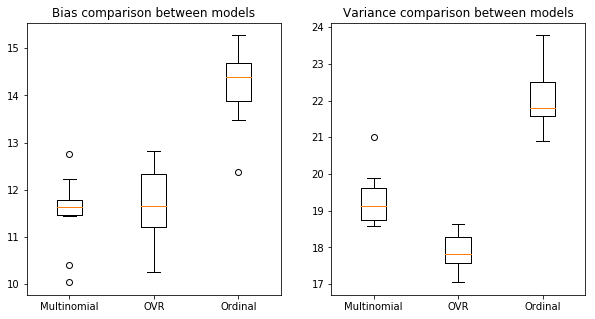

In [25]:
all_bias = [bias_1, bias_2, bias_3]
all_variance= [variance_1, variance_2, variance_3]

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
xlabels = ['Multinomial', 'OVR', 'Ordinal']

ax1.boxplot(all_bias, labels = xlabels);
ax1.title.set_text('Bias comparison between models');

ax2.boxplot(all_variance, labels = xlabels);
ax2.title.set_text('Variance comparison between models');

### 5.0 Hyperparameters tuning

The One vs. rest (OVR) logistic regression has been selected as the best algorithm. The next step is to perform hyperparameters tuning to improve the model performance by keeping the hyperparameters that have the highest average cross-validation score. Grid search method is used for tuning two hyperparemeters: C and solver for logistic regression model.

 - C: Inverse of regularization strength. Regularization is applying a penalty to increasing the magnitude of parameter values in order to reduce overfitting. <br>
 <br>
 - newton-cg: A newton method. Newton methods use an exact Hessian matrix. It's slow for large datasets, because it computes the second derivatives.
 - lbfgs: Stands for Limited-memory Broyden–Fletcher–Goldfarb–Shanno. It approximates the second derivative matrix updates with gradient evaluations. It stores only the last few updates, so it saves memory. It isn't super fast with large data sets.
 - liblinear: Library for Large Linear Classification. Uses a coordinate descent algorithm. Coordinate descent is based on minimizing a multivariate function by solving univariate optimization problems in a loop. In other words, it moves toward the minimum in one direction at a time.
 -  saga: Stochastic Average Gradient descent. A variation of gradient descent and incremental aggregated gradient approaches that uses a random sample of previous gradient values. Fast for big datasets. Allows for L1 regularization.
 
**Result:**
Compared with untuned 'OVR' logistic regression, the 'OVR' logistic regression using 'newton-cg' as solver and '0.01' as inverse of regularization strength has improved average accuracy from 36.63% to 36.88% and standard deviations of accuracy between folds from 1.98 to 1.93. From the bias and variance comparison between model algorithm before tuning and after tuning, it can be seen that the hyperparameters tuning decreases the prediction variance while increases a little bias as trade-off to maximize the prediction accuracy.

In [29]:
Salary_5 = Salary_Selected.copy()

y = Salary_5['Salary_Encoded']
Salary_5.drop(['Salary_Encoded'], axis=1, inplace = True)
X = Salary_5

X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, random_state=42, test_size=0.3)

model = LogisticRegression()
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X_Train)

best_model = model
best_params = {}
best_accuracy = 0
best_std = 0

for C in [0.0001, 0.001,0.01,0.05,0.1,0.5,1,5,10, 100]:
    for solver in ['newton-cg','lbfgs','liblinear','saga']:
        model = LogisticRegression(C=C, solver=solver, multi_class='ovr')
        accuracy = np.zeros(10)
        np_idx = 0
        
        for train_idx, test_idx in kfold.split(X_Train):
            X_train, X_test = X_Train.values[train_idx], X_Train.values[test_idx]
            y_train, y_test = y_Train.values[train_idx], y_Train.values[test_idx]

            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)

            model.fit(X_train, y_train)

            predictions = model.predict(X_test)
                
            ACC = accuracy_score(y_test, predictions)
            accuracy[np_idx] = ACC*100
            np_idx += 1
        
        if np.mean(accuracy) > best_accuracy:
            best_model = model
            best_params = {'C':C, 'solver':solver}
            best_accuracy = np.mean(accuracy)
            best_std = np.std(accuracy)

print (best_params)
print ("Best Score: {}%({}%)".format(round(best_accuracy,3),round(best_std,3)))      

print ("\nThe optimal log model uses C={}, and a {} solver, and has a cross validation score of {}% with a standard deviation of {}%".format(best_params['C'],best_params['solver'],round(best_accuracy,3),round(best_std,3)))

{'C': 0.01, 'solver': 'newton-cg'}
Best Score: 36.875%(1.933%)

The optimal log model uses C=0.01, and a newton-cg solver, and has a cross validation score of 36.875% with a standard deviation of 1.933%


##### Output from GridSearch

{'C': 0.01, 'solver': 'newton-cg'}
Best Score: 36.875%(1.933)

The optimal log model uses C=0.01, and a newton-cg solver, and has a cross validation score of 36.875% with a standard deviation of 1.933


Average Score: 36.875%
Standard deviation: 1.933


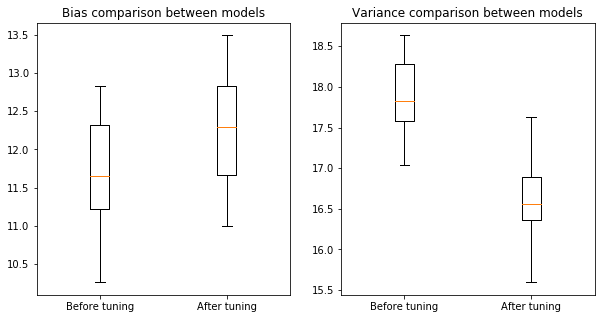

In [34]:
Salary_3 = Salary_Selected.copy()

y = Salary_3['Salary_Encoded']
Salary_3.drop(['Salary_Encoded'], axis=1, inplace = True)
X = Salary_3

X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, random_state=42, test_size=0.3)


model = LogisticRegression(C=0.01, solver = 'newton-cg', multi_class='ovr')
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X_Train)

accuracy = np.zeros(10)
np_idx = 0
bias_4 = np.zeros(10)
variance_4 = np.zeros(10)

for train_idx, test_idx in kfold.split(X_Train):
    X_train, X_test = X_Train.values[train_idx], X_Train.values[test_idx]
    y_train, y_test = y_Train.values[train_idx], y_Train.values[test_idx]
    
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    model.fit(X_train, y_train)
    
    predictions = model.predict(X_test)
    
    ACC = accuracy_score(y_test, predictions)
    
    accuracy[np_idx] = ACC*100
    bias_4[np_idx] = bias(predictions, y_test)
    variance_4[np_idx]= variance(predictions)
    
    np_idx += 1
    
    #print ("Fold {}: Accuracy: {}%".format(np_idx, round(ACC*100,2)))   

print("\nAverage Score: {}%".format(round(np.mean(accuracy),3)))
print("Standard deviation: {}".format(round(np.std(accuracy),3)))

all_bias = [bias_2, bias_4]
all_variance= [variance_2, variance_4]

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
xlabels = ['Before tuning', 'After tuning']

ax1.boxplot(all_bias, labels = xlabels);
ax1.title.set_text('Bias comparison between models');

ax2.boxplot(all_variance, labels = xlabels);
ax2.title.set_text('Variance comparison between models');

|Model|Accuracy|StD|
|-----|--------|---|
|Before tuning|36.63%|1.98|
|After tuning|36.88%|1.93|

### 6.0 Test and Discussion

The optimal model has an accuracy of 34.46% for training dataset and an accuracy of 32.38% for test dataset. <br>
The optimal model is generally underfitting because from the distribution plot it can be found that most of the predictions falls into the salary bucket 0, 10 and 12. Only a few predictions were correct for other salary buckets which suggests that the model may have oversimplifying assumptions about the dataset.

**Improvements:** <br>
To avoid model underfitting, the number of features should be increased thus the hypothesis space can be expanded. 

  - Improve the quality of original dataset. During the data cleaning stage, most of the original feature columns were dropped due to extremely low response rate. Some of the feature columns' inputs were replaced with new categorical entry 'Unknown' or the mode, which harms the quality and make the dataset more difficult to be differentiated by the regression algorithm <br>
   <br>
  - Improve the label/encoding procedure for the categorical inputs. As some columns have been encoded mannualy to emphasize the obvious ordered relationship, some columns that contain non-obvious relationship are not recognized. Take 'Country' for example, one hot encoding was used to treat each country equally as feature inputs. However, some developed countries are inherently better than other coutries in the aspect of salary earned. Therefore, orderly encode the categorical inputs with not so obvious ordered relationship should improve the model performance.<br>
  <br>
  - Improve the process of feature seleciton and engineering to add enough model complexity. Simply select the most important features may not be sufficient to develop a machine learning model with appropriate complexity. Apply feature engineering to the existing features help expand the hypothesis space by adding new features based on existing features.<br>
  <br>
  - Improve the algorithm training process by allowing more time for model training. For example, the model should be trained for long enough that the error/cost function (e.g., SSE or Cross Entropy) is sufficiently minimised.

In [38]:
Salary_6 = Salary_F.copy()

y = Salary_6['Salary_Encoded']
Salary_6.drop(['Salary_Encoded'], axis=1, inplace = True)
X = Salary_6

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(C=0.01, solver='newton-cg', multi_class = 'ovr')
model.fit(X_train, y_train)

predictions = model.predict(X_test)

ACC = accuracy_score(y_test, predictions)

print ("Test Accuracy: {}%".format(round(ACC*100,2)))

predictions_2 = model.predict(X_train)
ACC_2 = accuracy_score(y_train, predictions_2)
print ("Train Accuracy: {}%".format(round(ACC_2*100,2)))

Test Accuracy: 32.38%
Train Accuracy: 34.46%


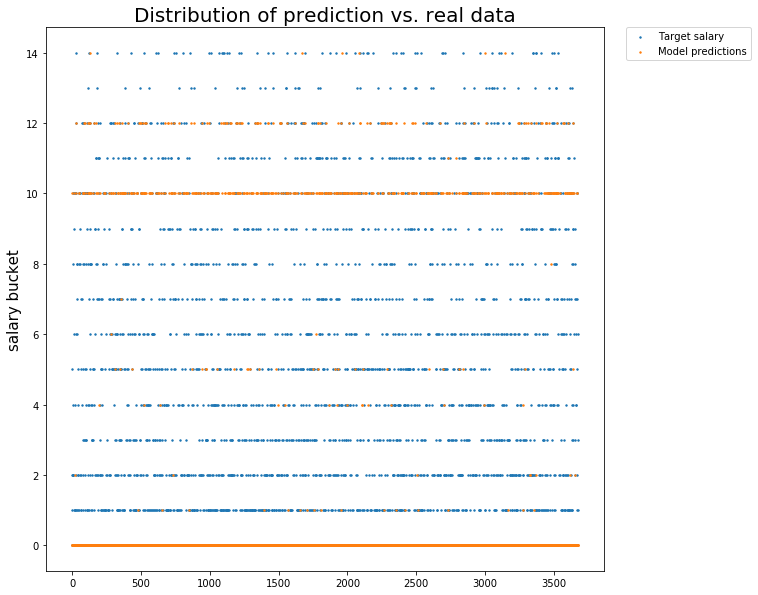

In [40]:
x = np.arange(0, len(predictions),1)
plt.figure(figsize=(10,10))
plt.scatter(x, y_test, s=2, label ='Target salary')
plt.scatter(x, predictions, s=2, label = 'Model predictions')
plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0);
plt.title('Distribution of prediction vs. real data', size=20)
plt.ylabel('salary bucket', size=15);